In [43]:
# importamos el dataset integrado previamente en sql
import pandas as pd
df = pd.read_csv("Datasets_sql\df_final.csv",sep = ",")

In [44]:
# Comprobamos
df[df["country"] == "Finland"]

,country,score,gdpPerCapita,lifeExpectancy,freedom,trust,generosity,year,idIncome,idPopulation,regionValue,incomeValue,population
5,Finland,7.41,1.29,0.89,0.64,0.41,0.23,2015,109,453,Europe & Central Asia,High income\r,5479461
158,Finland,7.41,1.41,0.81,0.57,0.41,0.25,2016,109,827,Europe & Central Asia,High income\r,5495219
311,Finland,7.47,1.44,0.81,0.62,0.38,0.25,2017,109,8,Europe & Central Asia,High income\r,5508140
459,Finland,7.63,1.31,0.87,0.68,0.39,0.20,2018,109,231,Europe & Central Asia,High income\r,5515461
611,Finland,7.77,1.34,0.99,0.60,0.39,0.15,2019,109,537,Europe & Central Asia,High income\r,5521537
763,Finland,7.81,1.29,0.96,0.66,0.20,0.16,2020,109,977,Europe & Central Asia,High income\r,5529468
912,Finland,7.84,1.45,0.74,0.69,0.19,0.12,2021,109,1397,Europe & Central Asia,High income\r,5535992
1057,Finland,7.82,1.89,0.78,0.74,0.53,0.11,2022,109,1598,Europe & Central Asia,High income\r,5540746


In [45]:
# Hacemos unas ultimas transformaciones
df["incomeValue"] = df["incomeValue"].str.strip()
df.country = df.country.astype("category")
df.regionValue = df.regionValue.astype("category")
df.incomeValue = df.incomeValue.astype("category")
df.drop(["idIncome", "idPopulation"],axis = 1,inplace=True)

In [46]:
df.columns

Index(['country', 'score', 'gdpPerCapita', 'lifeExpectancy', 'freedom',
       'trust', 'generosity', 'year', 'regionValue', 'incomeValue',
       'population'],
      dtype='object')

In [47]:
# Reordenamos las columnas
df = df.reindex(columns=['country','regionValue', 'score', 'gdpPerCapita', 'lifeExpectancy', 'freedom',
       'trust', 'generosity','population','incomeValue','year'])


In [48]:
df.sample(10)

,country,regionValue,score,gdpPerCapita,lifeExpectancy,freedom,trust,generosity,population,incomeValue,year
514,Jamaica,Latin America & Caribbean,5.89,0.82,0.69,0.58,0.03,0.10,2811835,Upper middle income,2018
443,Angola,Sub-Saharan Africa,3.80,0.86,0.05,0.00,0.07,0.10,30208628,Lower middle income,2017
933,Bahrain,Middle East & North Africa,6.65,1.41,0.66,0.66,0.72,0.25,1463266,High income,2021
227,Croatia,Europe & Central Asia,5.49,1.19,0.71,0.24,0.04,0.18,4223751,High income,2016
1151,Liberia,Sub-Saharan Africa,5.12,0.64,0.31,0.41,0.08,0.18,5302681,Low income,2022
890,Swaziland,Sub-Saharan Africa,4.31,0.83,0.22,0.30,0.71,0.07,1180655,Lower middle income,2020
214,Belarus,Europe & Central Asia,5.80,1.13,0.63,0.29,0.17,0.14,9708110,Upper middle income,2016
981,Paraguay,Latin America & Caribbean,5.65,0.98,0.55,0.60,0.88,0.21,6703799,Upper middle income,2021
748,Comoros,Sub-Saharan Africa,3.97,0.27,0.51,0.14,0.08,0.28,790986,Lower middle income,2019
138,Gabon,Sub-Saharan Africa,3.90,1.06,0.43,0.32,0.11,0.07,2028517,Upper middle income,2015


# EDA

#### Realizamos un EDA (`E`xploratory, `D`ata, `A`nalysis)

In [49]:
df.info()
# Podemos observar que no hay valores nulos y que los tipos de datos son correctos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country         1200 non-null   category
 1   regionValue     1200 non-null   category
 2   score           1200 non-null   float64 
 3   gdpPerCapita    1200 non-null   float64 
 4   lifeExpectancy  1200 non-null   float64 
 5   freedom         1200 non-null   float64 
 6   trust           1200 non-null   float64 
 7   generosity      1200 non-null   float64 
 8   population      1200 non-null   int64   
 9   incomeValue     1200 non-null   category
 10  year            1200 non-null   int64   
dtypes: category(3), float64(6), int64(2)
memory usage: 85.7 KB


In [50]:
df.describe()
# Al observar los resultados podemos notar que en la mayoría de los casos la media se acerca a la mediana (percentil 50%), lo que sugiere que los datos tienen una distribución adecuada.

,score,gdpPerCapita,lifeExpectancy,freedom,trust,generosity,population,year
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000
mean,5.440333,0.981308,0.611225,0.441658,0.277417,0.201850,5.039596e+07,2018.447500
std,1.122976,0.438610,0.242896,0.154387,0.288629,0.115632,1.644842e+08,2.283255
min,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,3.310600e+05,2015.000000
25%,4.580000,0.670000,0.440000,0.350000,0.070000,0.120000,5.078682e+06,2016.000000
50%,5.450000,1.020000,0.640000,0.460000,0.140000,0.190000,1.184314e+07,2018.000000
75%,6.252500,1.300000,0.790000,0.560000,0.410000,0.260000,3.748866e+07,2020.000000
max,7.840000,2.210000,1.140000,0.740000,0.940000,0.840000,1.425893e+09,2022.000000


In [51]:
# Importamos librerias a utilizar
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
sns.set()


<Axes: xlabel='incomeValue', ylabel='count'>

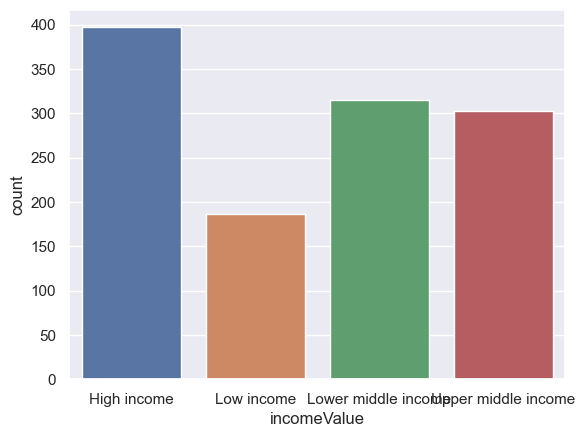

In [52]:
# Observamos las distribución de las variables objetivo a predecir (y)
sns.countplot(x='incomeValue', data=df) 

<Axes: xlabel='incomeValue_2', ylabel='count'>

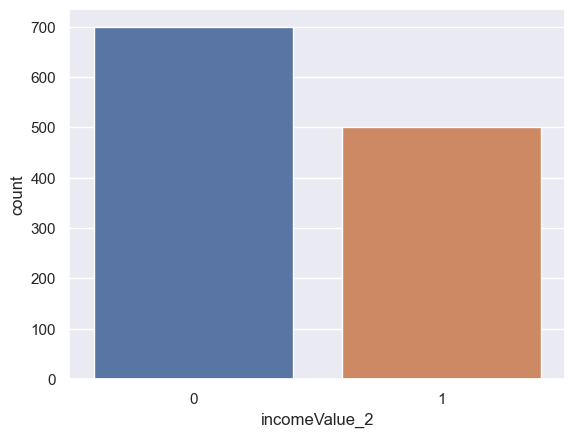

In [53]:
# Excluimos el año para el análisis
df = df.drop(["year",],axis=1)

# Puede resultar confuso tantas variables objetivo, por lo que las podemos reducir para el análisis
df.loc[df['incomeValue'] == "Lower middle income", 'incomeValue'] = "Low income"
df.loc[df['incomeValue'] == "Upper middle income", 'incomeValue'] = "High income"

# Convertimos a númerico las variables para un mejor análisis en el modelo
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["incomeValue_2"] = le.fit_transform(df["incomeValue"])
df["regionValue_2"] = le.fit_transform(df["regionValue"])

# Y observamos su distribución 
sns.countplot(x='incomeValue_2', data=df) 

In [54]:
# Excluimos las variables ya cambiadas
df = df.drop(["regionValue","incomeValue"],axis=1)

In [55]:
df.head(2)

,country,score,gdpPerCapita,lifeExpectancy,freedom,trust,generosity,population,incomeValue_2,regionValue_2
0,Switzerland,7.59,1.4,0.94,0.67,0.42,0.30,8281732,0,1
1,Iceland,7.56,1.3,0.95,0.63,0.14,0.44,331060,0,1


C:\Users\matia\AppData\Local\Temp\ipykernel_3832\2919963409.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


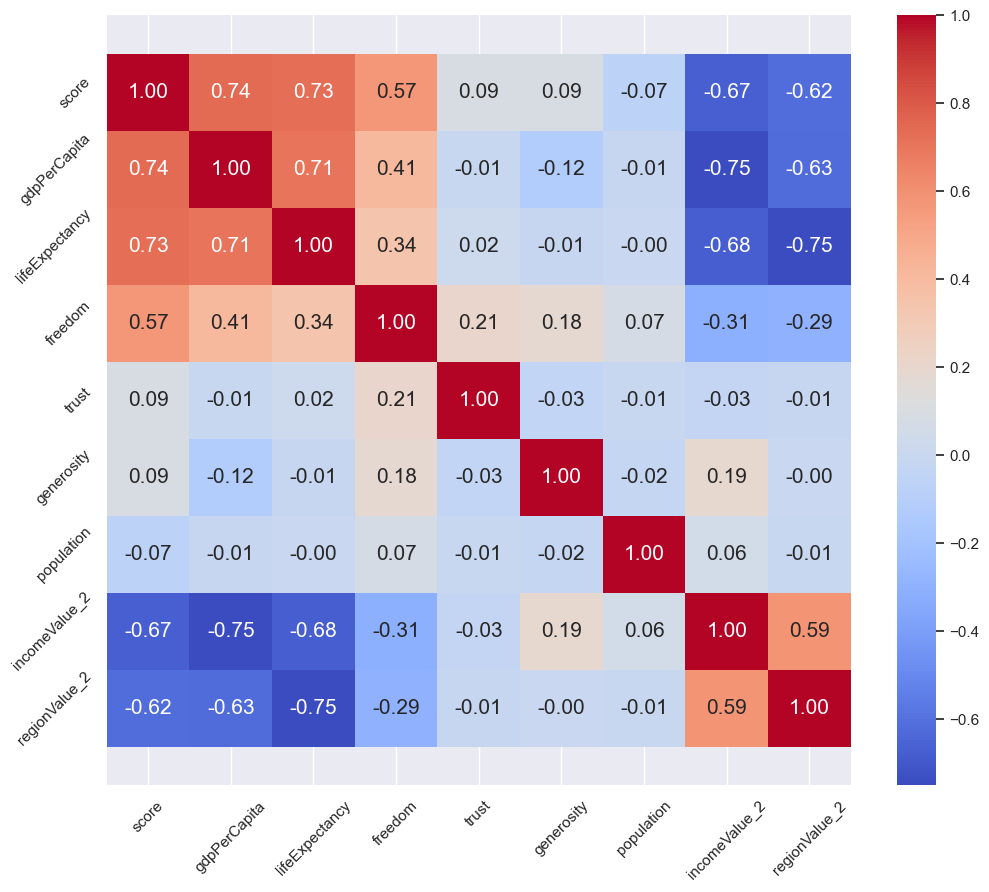

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vemos las correlaciones entre las variables
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

corr = df.corr()
plot_corre_heatmap(corr)  

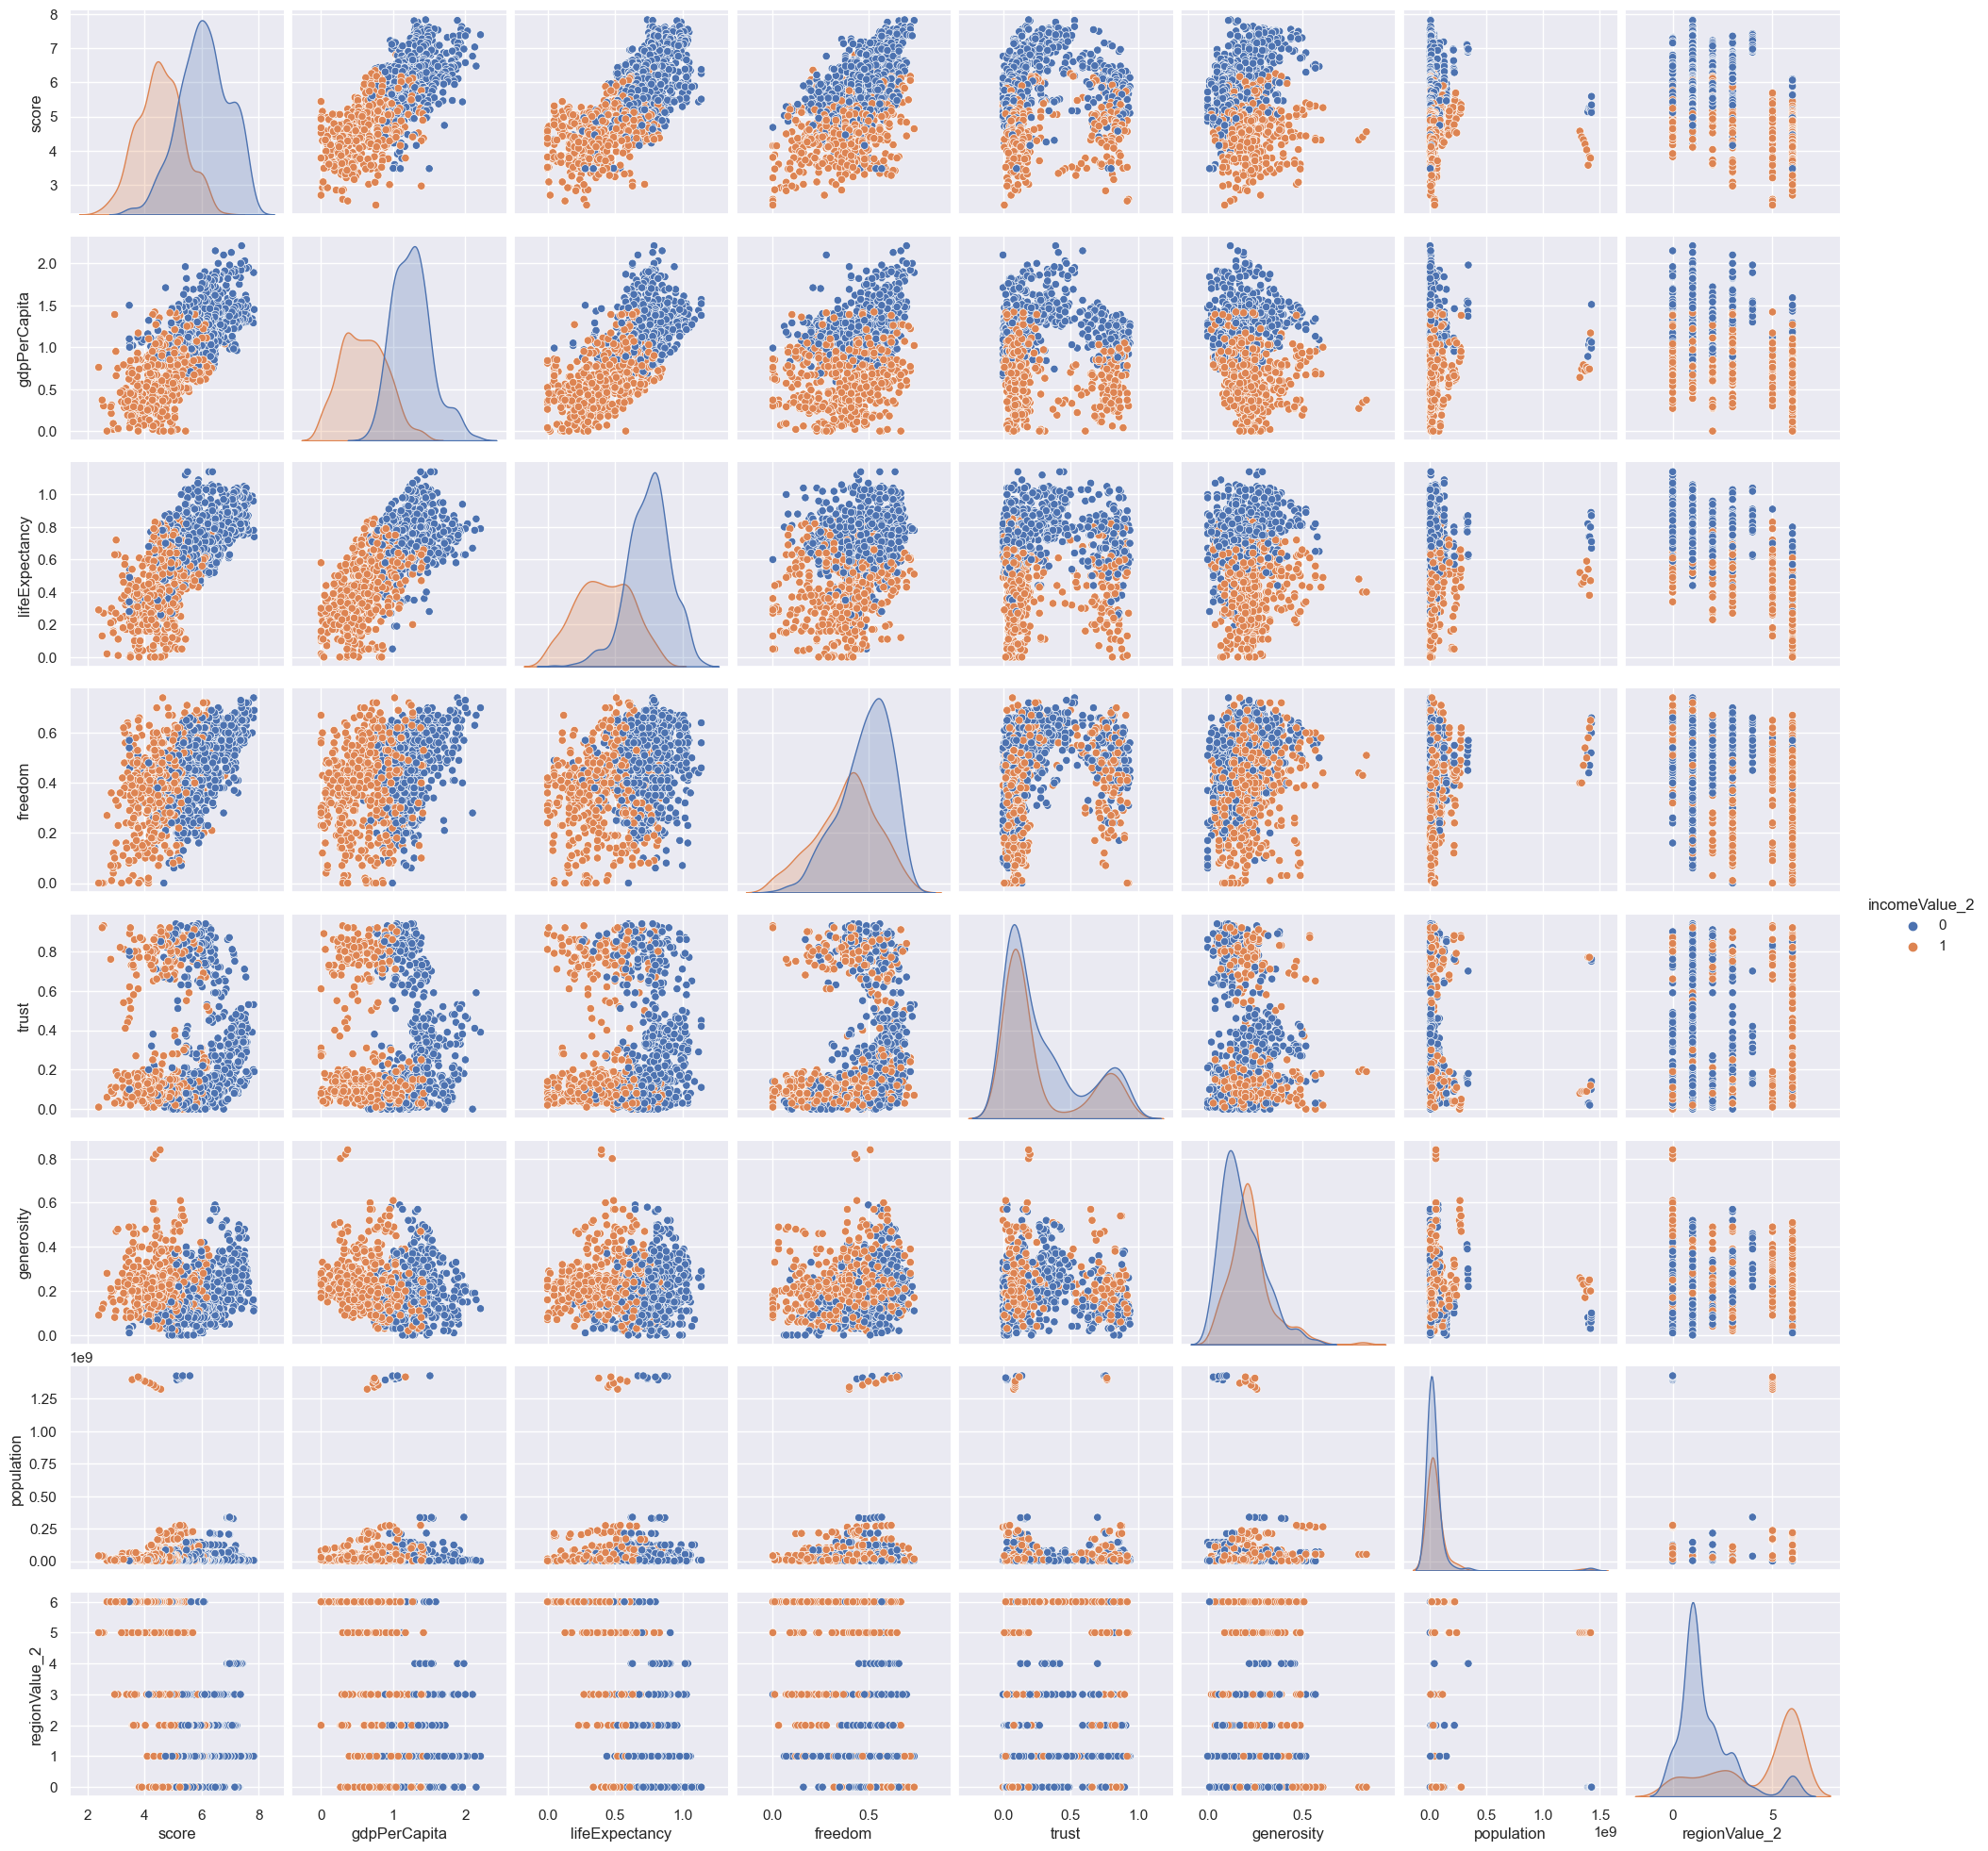

In [57]:
# Analizamos el pairplot
sns.pairplot(df, hue = 'incomeValue_2')


In [58]:
# Definimos X (variables explicativas) y "y"(variable objetiva a predecir)
X = df.drop(["incomeValue_2","country"],axis=1)
y = df.incomeValue_2

In [59]:
X

,score,gdpPerCapita,lifeExpectancy,freedom,trust,generosity,population,regionValue_2
0,7.59,1.40,0.94,0.67,0.42,0.30,8281732,1
1,7.56,1.30,0.95,0.63,0.14,0.44,331060,1
2,7.53,1.33,0.87,0.65,0.48,0.34,5677796,1
3,7.52,1.46,0.89,0.67,0.37,0.35,5190357,1
4,7.43,1.33,0.91,0.63,0.33,0.46,35732126,4
...,...,...,...,...,...,...,...,...
1195,3.47,1.50,0.28,0.57,0.10,0.01,2630296,6
1196,3.27,0.79,0.46,0.62,0.54,0.19,13776698,6
1197,3.00,0.95,0.27,0.33,0.11,0.11,16320537,6
1198,2.96,1.39,0.63,0.10,0.03,0.08,5489740,3


In [60]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    1
1197    1
1198    1
1199    1
Name: incomeValue_2, Length: 1200, dtype: int32

# **Decision Tree Classifier**

#### Utilizamos un modelo de machine learning de clasificación para predecir la variable objetivo "Y", que en este caso es el ingreso (Income) por país.

In [61]:
#importar librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import numpy as np
from IPython.display import clear_output


# Utilizamos validación cruzada para hallar la mejor profundidad (hiper parámetro) para el árbol de decisión
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_test_scores_mean = np.array(tree_test_scores_mean)


Completado: 100.0%


In [62]:
# Observamos los resultados del set de entrenamiento, se puede apreciar que lleva a overfitting en las profundidades mas altas +10
tree_train_scores_mean

array([0.88541667, 0.88729167, 0.92666667, 0.943125  , 0.95916667,
       0.97145833, 0.98270833, 0.99291667, 0.99625   , 0.99875   ,
       0.99979167, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [63]:
# Observamos los resultados del set de testeo, se puede apreciar que en la profundidad 7 o 8 se hallan los mejores resultados
tree_test_scores_mean

array([0.87583333, 0.87583333, 0.905     , 0.9175    , 0.92666667,
       0.925     , 0.9325    , 0.93416667, 0.93333333, 0.93416667,
       0.9325    , 0.935     , 0.93166667, 0.9275    , 0.92916667,
       0.92833333, 0.93833333, 0.93416667, 0.93083333])

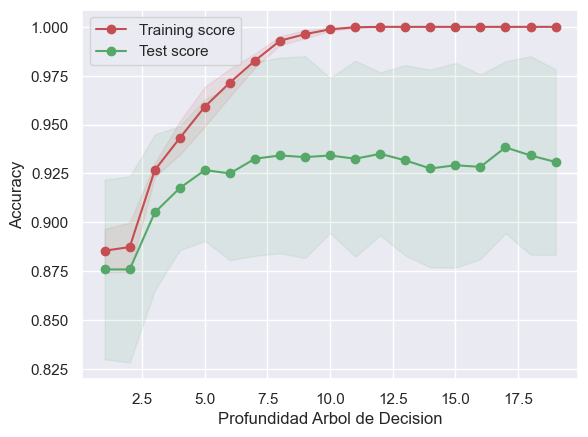

In [64]:
# Graficamos para observar lo anteriormente dicho

import matplotlib.pyplot as plt

plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [65]:
# Procedemos a armar el modelo de árbol de decición

from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier, utilizamos profundidad 7
clf = DecisionTreeClassifier(max_depth = 7, random_state = 42) 

# Separamos el set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#entrenamos
clf.fit(X_train.values,y_train.values)

print(f"Categorias: {clf.classes_} Cantidad: {clf.n_classes_} ") 
print(f"Cantidad de variables en x: {clf.max_features_}") 
print(f"Importancia de las variables: {clf.feature_importances_}")

# Predecimos para testeo y entrenamiento
y_pred_test = clf.predict(X_test.values)
y_pred_train = clf.predict(X_train.values)



Categorias: [0 1] Cantidad: 2 
Cantidad de variables en x: 8
Importancia de las variables: [0.09756468 0.63326517 0.04314188 0.03147922 0.00793104 0.03433073
 0.11648529 0.03580198]


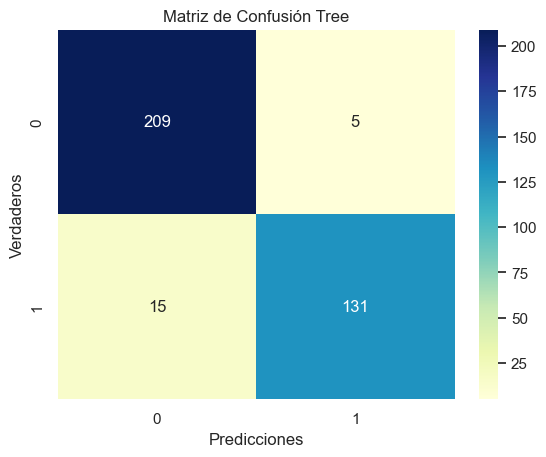

In [66]:
# Ahora hacemos la matriz de confusion para observar visualmente
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión Tree")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

In [67]:
# Calculamos las métricas de evaluación con las librerias correspondientes
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

exactitud = accuracy_score(y_test, y_pred_test)
exactitud2 = accuracy_score(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test, average= None)

recall = recall_score(y_test, y_pred_test, average= None)

# Podemos observar que nos da buenos valores
print("Exactitud de testeo:",round(exactitud,2))
print("Exactitud de entrenamiento:",round(exactitud2,2))
print("Precisión para cada categoria:",precision)
print("Recall para cada categoria:",recall)


Exactitud de testeo: 0.94
Exactitud de entrenamiento: 0.99
Precisión para cada categoria: [0.93303571 0.96323529]
Recall para cada categoria: [0.97663551 0.89726027]


In [68]:
# Calculamos las métricas de evaluación con la matriz de confusión

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Exactitud (Accuracy): {:.2f}".format(accuracy))
print("Especificidad: {:.2f}".format(specificity))
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


Exactitud (Accuracy): 0.94
Especificidad: 0.98
Precisión: 0.96
Recall: 0.90


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


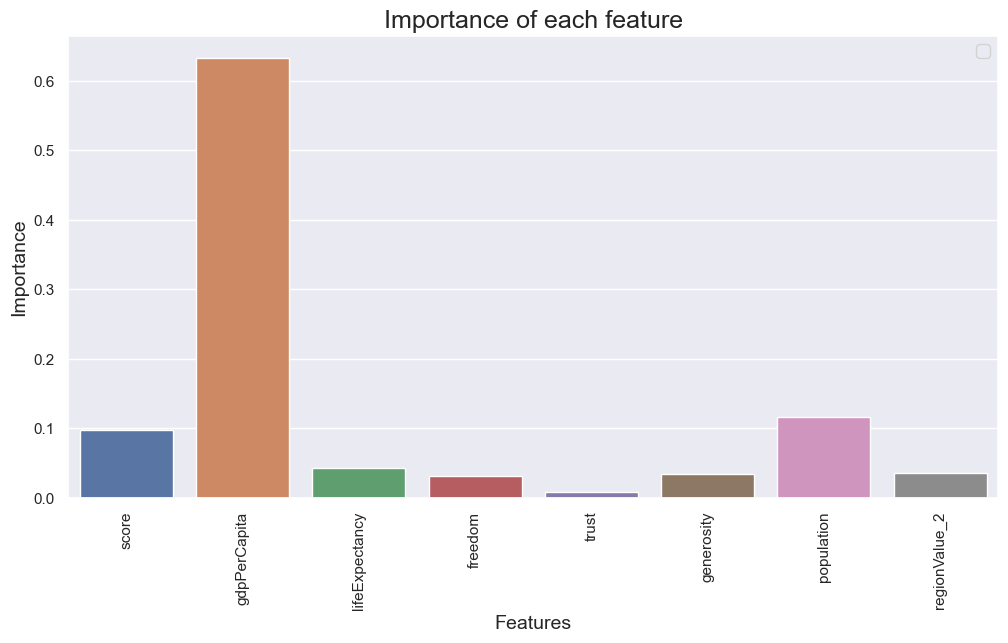

In [69]:
# Vemos la importancia de cada variable de x en el modelo
plt.figure(figsize=(12, 6))

importances = clf.feature_importances_
columns = X.columns

# Rotar el texto de los nombres de las columnas
sns.barplot(x=columns, y=importances)
plt.xticks(rotation=90)

# Ajustar el tamaño de fuente de los nombres de las columnas
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Usar una paleta de colores más legible
colors = sns.color_palette('viridis', len(columns))
sns.set_palette(colors)

# Ajustar el tamaño de fuente de la leyenda
plt.title('Importance of each feature', fontsize=18)
plt.legend(fontsize=12)

plt.show()

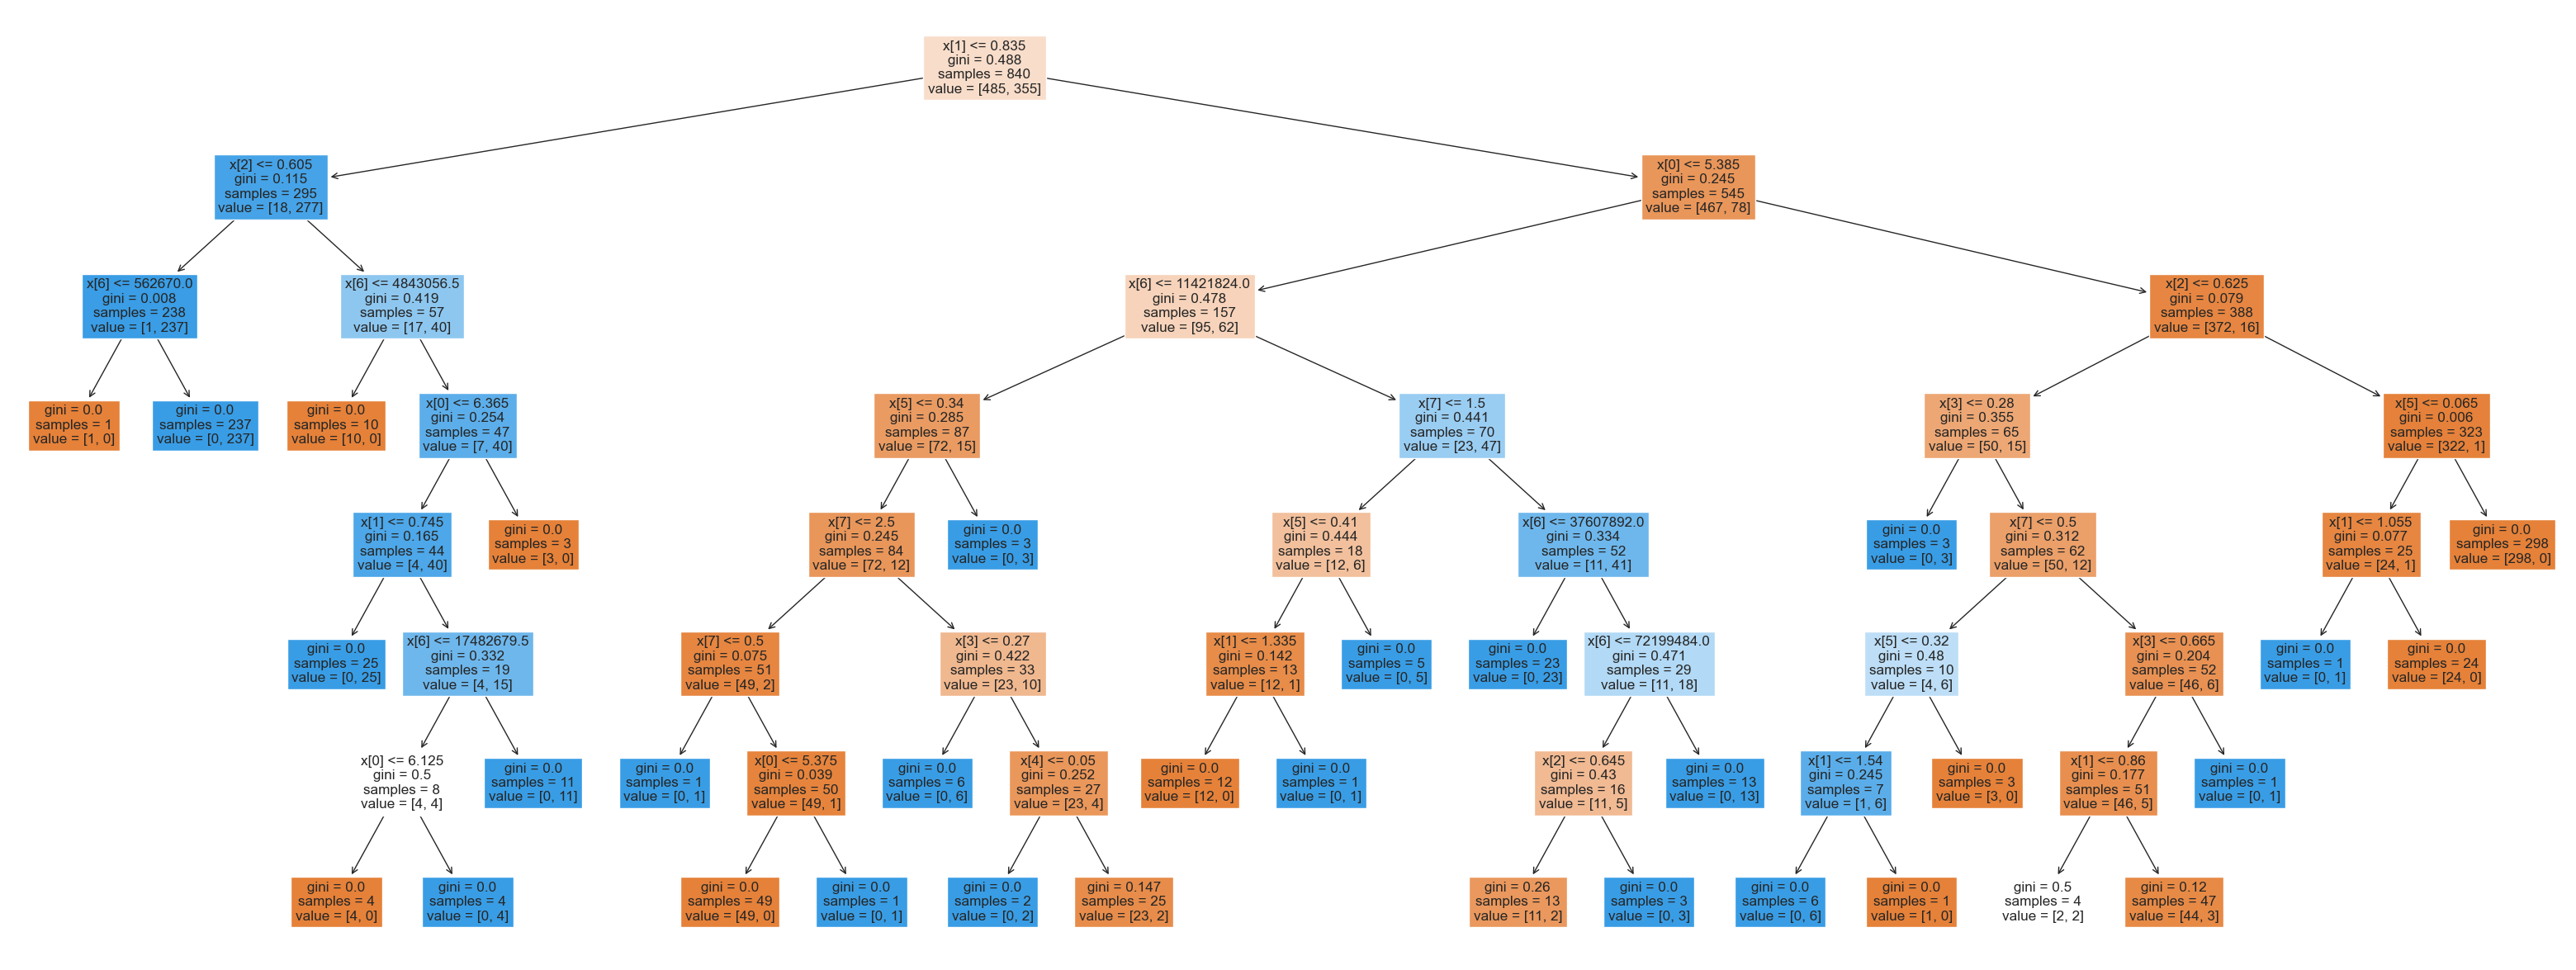

In [70]:
# Vemos la estructura del árbol 
plt.figure(figsize = (40,15))
tree.plot_tree(clf, filled = True)
plt.show()